In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shahriariit/opendataset/master/Parkinson%20(1).csv')

In [ ]:
df.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0


In [ ]:
df.describe()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.000044,0.003172,0.003532,0.038428,0.336832,0.021499,0.023468,0.028671,59.328203,63.674583,74.198478,80.187240,81.505404,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.000045,0.003373,0.004449,0.023213,0.205905,0.013787,0.014402,0.016610,14.541946,15.621195,16.442566,17.187765,17.395830,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,22.224723,26.274029,33.156101,36.494025,36.908213,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.000019,0.001551,0.001867,0.024336,0.211785,0.012909,0.014986,0.019180,50.558623,54.237537,63.879230,69.823899,70.435013,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,59.742330,64.844019,75.457858,80.992704,82.354119,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,68.686365,73.439434,85.652177,92.330509,93.500429,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.000550,0.043843,0.065199,0.192600,1.747600,0.113240,0.120760,0.142440,101.206326,109.651117,120.712830,128.289325,129.985236,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [ ]:
print(df.shape)

(240, 47)


In [ ]:
df

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.000037,0.003701,0.005149,0.016868,0.14928,0.008835,0.010232,0.015297,28.530790,28.625326,37.778480,43.165327,44.085825,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.000015,0.001270,0.001497,0.017923,0.16720,0.008436,0.011578,0.015473,33.617211,36.264629,45.526764,52.135100,53.417630,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.000022,0.001354,0.001615,0.028040,0.24182,0.015937,0.015441,0.021133,56.853169,64.663462,76.610752,82.794477,83.509902,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.000037,0.002724,0.002258,0.064605,0.58002,0.041295,0.027626,0.037650,60.096871,67.562663,79.713585,86.826843,87.382895,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188

In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 46 columns]


In [ ]:
cor_matrix = df.corr().abs()
print(cor_matrix)

            Recording    Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
Recording    1.000000  0.000000    0.044546  ...  0.034092  0.010992  0.012266
Gender       0.000000  1.000000    0.135454  ...  0.059618  0.085331  0.030258
Jitter_rel   0.044546  0.135454    1.000000  ...  0.210139  0.133657  0.194717
Jitter_abs   0.044647  0.271361    0.959368  ...  0.138254  0.054356  0.117935
Jitter_RAP   0.049644  0.087452    0.989639  ...  0.220211  0.138732  0.203559
Jitter_PPQ   0.033520  0.110019    0.960413  ...  0.169872  0.113360  0.159312
Shim_loc     0.048838  0.230299    0.553118  ...  0.174087  0.128380  0.186392
Shim_dB      0.046766  0.225782    0.562450  ...  0.176858  0.128469  0.185803
Shim_APQ3    0.054695  0.209274    0.544672  ...  0.197485  0.152808  0.208870
Shim_APQ5    0.041101  0.248667    0.557271  ...  0.172593  0.124136  0.183937
Shi_APQ11    0.039617  0.290692    0.568150  ...  0.114050  0.059406  0.128051
HNR05        0.019912  0.053779    0.061390  ...  0.

In [ ]:
cor_matrix.style.background_gradient(cmap = 'coolwarm')

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
Recording,1.000000,0.000000,0.044546,0.044647,0.049644,0.033520,0.048838,0.046766,0.054695,0.041101,0.039617,0.019912,0.019068,0.021646,0.024538,0.023303,0.039036,0.018598,0.019366,0.003871,0.000159,0.026035,0.076182,0.014300,0.030018,0.000532,0.007484,0.003178,0.036448,0.040061,0.032386,0.009154,0.033456,0.021361,0.007354,0.009121,0.047059,0.021205,0.007367,0.023859,0.038281,0.029152,0.032023,0.034092,0.010992,0.012266
Gender,0.000000,1.000000,0.135454,0.271361,0.087452,0.110019,0.230299,0.225782,0.209274,0.248667,0.290692,0.053779,0.136940,0.145239,0.153131,0.160006,0.307172,0.290182,0.383790,0.089231,0.042900,0.071604,0.155735,0.048759,0.068577,0.055763,0.047926,0.034887,0.093529,0.017678,0.029426,0.041662,0.024166,0.028847,0.047784,0.098908,0.033447,0.092475,0.008833,0.118392,0.056608,0.063648,0.063715,0.059618,0.085331,0.030258
Jitter_rel,0.044546,0.135454,1.000000,0.959368,0.989639,0.960413,0.553118,0.562450,0.544672,0.557271,0.568150,0.061390,0.041148,0.033777,0.033037,0.032508,0.584696,0.194760,0.444292,0.187010,0.188779,0.133097,0.135383,0.169128,0.170547,0.154537,0.179349,0.185427,0.201774,0.207974,0.182964,0.197527,0.197841,0.222468,0.186619,0.205878,0.198524,0.216079,0.165935,0.213089,0.180207,0.177738,0.168942,0.210139,0.133657,0.194717
Jitter_abs,0.044647,0.271361,0.959368,1.000000,0.933650,0.919515,0.555033,0.562033,0.538759,0.565286,0.592876,0.024018,0.071578,0.086264,0.090866,0.092548,0.631190,0.310391,0.460753,0.168900,0.111491,0.087503,0.087389,0.078393,0.085273,0.064370,0.107126,0.113512,0.115021,0.122948,0.096584,0.104648,0.115409,0.137119,0.111871,0.121421,0.116680,0.119322,0.079766,0.120070,0.077534,0.101834,0.076002,0.138254,0.054356,0.117935
Jitter_RAP,0.049644,0.087452,0.989639,0.933650,1.000000,0.965718,0.533336,0.540775,0.529687,0.538114,0.537901,0.076836,0.067950,0.063336,0.062956,0.062595,0.513842,0.146251,0.405801,0.171624,0.188021,0.143417,0.142986,0.181292,0.178211,0.171342,0.180553,0.191786,0.216488,0.203482,0.190259,0.203348,0.202202,0.221791,0.187435,0.218824,0.194560,0.223579,0.173584,0.213661,0.187177,0.182973,0.174393,0.220211,0.138732,0.203559
Jitter_PPQ,0.033520,0.110019,0.960413,0.919515,0.965718,1.000000,0.426516,0.434961,0.412984,0.454206,0.464256,0.062265,0.057381,0.054081,0.051808,0.050100,0.445463,0.099076,0.332735,0.107237,0.156994,0.105009,0.097254,0.147311,0.144420,0.133950,0.141901,0.151878,0.169040,0.168423,0.149970,0.161832,0.158212,0.182835,0.156203,0.172094,0.166806,0.169944,0.138036,0.160569,0.139651,0.141040,0.122192,0.169872,0.113360,0.159312
Shim_loc,0.048838,0.230299,0.553118,0.555033,0.533336,0.426516,1.000000,0.996661,0.995057,0.984148,0.967815,0.066146,0.058899,0.051015,0.053841,0.046994,0.707779,0.155374,0.426006,0.250723,0.163091,0.111920,0.097784,0.236364,0.211525,0.173505,0.210040,0.238219,0.185708,0.229102,0.242876,0.207342,0.216345,0.228348,0.150215,0.208185,0.179975,0.190336,0.197430,0.215387,0.220893,0.160363,0.178992,0.174087,0.128380,0.186392
Shim_dB,0.046766,0.225782,0.562450,0.562033,0.540775,0.434961,0.996661,1.000000,0.991123,0.980253,0.965201,0.068252,0.059309,0.051153,0.054238,0.047421,0.711479,0.156370,0.427590,0.253407,0.164723,0.113034,0.098917,0.237183,0.210823,0.173062,0.211934,0.242045,0.188426,0.233625,0.244303,0.206930,0.221998,0.228637,0.152383,0.206367,0.181817,0.193814,0.197936,0.217099,0.224020,0.164510,0.178815,0.176858,0.128469,0.185803
Shim_APQ3,0.054695,0.209274,0.544672,0.538759,0.529687,0.412984,0.995057,0.991123,1.000000,0.968447,0.941329,0.093127,0.083303,0.075280,0.076831,0.070864,0.690211,0.169609,0.416037,0.266167,0.186905,0.129729,0.112352,0.256067,0.233310,0.197067,0.231147,0.257483,0.211686,0.246091

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

            Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
Recording         NaN     0.0    0.044546  ...  0.034092  0.010992  0.012266
Gender            NaN     NaN    0.135454  ...  0.059618  0.085331  0.030258
Jitter_rel        NaN     NaN         NaN  ...  0.210139  0.133657  0.194717
Jitter_abs        NaN     NaN         NaN  ...  0.138254  0.054356  0.117935
Jitter_RAP        NaN     NaN         NaN  ...  0.220211  0.138732  0.203559
Jitter_PPQ        NaN     NaN         NaN  ...  0.169872  0.113360  0.159312
Shim_loc          NaN     NaN         NaN  ...  0.174087  0.128380  0.186392
Shim_dB           NaN     NaN         NaN  ...  0.176858  0.128469  0.185803
Shim_APQ3         NaN     NaN         NaN  ...  0.197485  0.152808  0.208870
Shim_APQ5         NaN     NaN         NaN  ...  0.172593  0.124136  0.183937
Shi_APQ11         NaN     NaN         NaN  ...  0.114050  0.059406  0.128051
HNR05             NaN     NaN         NaN  ...  0.608461  0.643066  0.616970

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'Shi_APQ11', 'HNR15', 'HNR25', 'HNR35', 'HNR38']


In [ ]:
X = df.drop(to_drop, 1)
y = Y

In [ ]:
X

,Recording,Gender,Jitter_rel,Shim_loc,HNR05,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,1,1,0.25546,0.030256,59.437966,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,2,1,0.36964,0.023146,59.838895,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,3,1,0.23514,0.019338,57.293808,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,1,0,0.29320,0.024716,62.179573,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,2,0,0.23075,0.013119,67.534024,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.016868,28.530790,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144
236,3,0,0.23322,0.017923,33.617211,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835
237,1,0,0.26862,0.028040,56.853169,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409
238,2,0,0.45376,0.064605,60.096871,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188,1.319729,1.348004,1.272970,1.436992,1.377636,1.396786,1.329500,1.385370,1.331995,1.313494,1.402723,1.295076,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Status, Length: 240, dtype: int64

In [ ]:
df = pd.DataFrame(X)
df['Status']=y

In [ ]:
df

,Recording,Gender,Jitter_rel,Shim_loc,HNR05,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.030256,59.437966,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.023146,59.838895,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.019338,57.293808,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.024716,62.179573,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.013119,67.534024,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.016868,28.530790,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.017923,33.617211,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.028040,56.853169,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.064605,60.096871,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188,1.319729,1.348004,1.272970,1.436992,1.377636,1.396786,1.329500,1.385370,1.331995,1.313494,1.402723,1.295076,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353,1


In [ ]:
print(df.shape)
print(df.info())

(240, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recording   240 non-null    int64  
 1   Gender      240 non-null    int64  
 2   Jitter_rel  240 non-null    float64
 3   Shim_loc    240 non-null    float64
 4   HNR05       240 non-null    float64
 5   RPDE        240 non-null    float64
 6   DFA         240 non-null    float64
 7   PPE         240 non-null    float64
 8   GNE         240 non-null    float64
 9   MFCC0       240 non-null    float64
 10  MFCC1       240 non-null    float64
 11  MFCC2       240 non-null    float64
 12  MFCC3       240 non-null    float64
 13  MFCC4       240 non-null    float64
 14  MFCC5       240 non-null    float64
 15  MFCC6       240 non-null    float64
 16  MFCC7       240 non-null    float64
 17  MFCC8       240 non-null    float64
 18  MFCC9       240 non-null    float64
 19  MFCC10      240 non

In [ ]:
df.describe()

,Recording,Gender,Jitter_rel,Shim_loc,HNR05,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.400000,0.583987,0.038428,59.328203,0.310517,0.612911,0.271958,0.917801,1.345764,1.302292,1.289089,1.349270,1.354317,1.338350,1.334774,1.339938,1.354771,1.346205,1.346094,1.355388,1.338195,1.338939,1.335040,1.342467,1.343238,1.348914,1.337717,1.341786,1.340895,1.343978,1.341472,1.331433,1.346381,1.346144,0.500000
std,0.818203,0.490922,0.535769,0.023213,14.541946,0.065639,0.077780,0.229851,0.033911,0.209207,0.235640,0.259544,0.215538,0.212376,0.216225,0.207402,0.216467,0.214952,0.203527,0.210776,0.215601,0.204511,0.222206,0.223335,0.227232,0.198174,0.212008,0.204978,0.209407,0.213689,0.211364,0.204085,0.211297,0.221484,0.208819,0.501045
min,1.000000,0.000000,0.148010,0.007444,22.224723,0.162762,0.411359,0.004127,0.847307,0.770151,0.725522,0.569471,0.727609,0.771259,0.611540,0.829087,0.653565,0.839535,0.823632,0.813607,0.823157,0.844357,0.620845,0.647406,0.628107,0.766458,0.840133,0.741690,0.759689,0.764649,0.762798,0.811942,0.777012,0.643132,0.748411,0.000000
25%,1.000000,0.000000,0.298260,0.024336,50.558623,0.263217,0.556756,0.040811,0.891408,1.208843,1.149207,1.122922,1.212101,1.218042,1.199275,1.204434,1.188848,1.220585,1.221013,1.229496,1.204163,1.197492,1.198202,1.182790,1.196205,1.208624,1.221101,1.197868,1.194186,1.194138,1.191881,1.189515,1.192397,1.202525,1.206559,0.000000
50%,2.000000,0.000000,0.481455,0.032960,59.742330,0.305054,0.606502,0.246486,0.912809,1.340906,1.294779,1.298645,1.338791,1.342907,1.331794,1.323245,1.321939,1.340258,1.334706,1.338213,1.356528,1.338452,1.333607,1.341507,1.323866,1.351015,1.342237,1.337233,1.338437,1.344416,1.335517,1.349243,1.333345,1.347297,1.331212,0.500000
75%,3.000000,1.000000,0.681685,0.045475,68.686365,0.349273,0.661144,0.405402,0.946479,1.491018,1.474178,1.479907,1.496511,1.497181,1.473760,1.452817,1.486387,1.482438,1.486456,1.466926,1.515044,1.474081,1.482893,1.485977,1.491861,1.488878,1.470287,1.485597,1.496845,1.490389,1.495355,1.475330,1.472589,1.506674,1.475235,1.000000
max,3.000000,1.000000,6.838200,0.192600,101.206326,0.535953,0.784376,0.908395,0.987292,1.949103,1.835651,1.928430,1.857084,1.840846,1.976153,2.000783,2.016728,1.918429,2.039576,2.071291,1.983561,2.029982,2.028056,2.021287,1.979858,1.860588,2.038241,1.785984,1.988090,1.872799,1.920131,1.943331,1.949679,1.918392,1.930103,1.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Recording      2.000000
Gender         1.000000
Jitter_rel     0.383425
Shim_loc       0.021139
HNR05         18.127742
RPDE           0.086056
DFA            0.104387
PPE            0.364591
GNE            0.055071
MFCC0          0.282176
MFCC1          0.324971
MFCC2          0.356985
MFCC3          0.284410
MFCC4          0.279138
MFCC5          0.274485
MFCC6          0.248383
MFCC7          0.297538
MFCC8          0.261852
MFCC9          0.265443
MFCC10         0.237430
MFCC11         0.310882
MFCC12         0.276588
Delta0         0.284692
Delta1         0.303186
Delta2         0.295655
Delta3         0.280254
Delta4         0.249186
Delta5         0.287729
Delta6         0.302659
Delta7         0.296252
Delta8         0.303474
Delta9         0.285815
Delta10        0.280192
Delta11        0.304149
Delta12        0.268676
Status         1.000000
dtype: float64


In [ ]:
df = df[~((df< (Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))).any(axis =1)]

In [ ]:
print(df.shape)

(203, 36)


In [ ]:
df

,Recording,Gender,Jitter_rel,Shim_loc,HNR05,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12,Status
0,1,1,0.25546,0.030256,59.437966,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610,0
1,2,1,0.36964,0.023146,59.838895,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508,0
2,3,1,0.23514,0.019338,57.293808,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402,0
3,1,0,0.29320,0.024716,62.179573,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456,0
4,2,0,0.23075,0.013119,67.534024,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,0,0.57585,0.016868,28.530790,0.215651,0.593082,0.167809,0.930245,1.145728,1.143635,1.117527,1.149514,1.137022,1.146306,1.137069,1.122076,1.170275,1.112929,1.134914,1.127654,1.071029,1.111652,1.084720,1.149059,1.116409,1.104511,1.099866,1.080320,1.154057,1.117423,1.167076,1.132436,1.107824,1.109144,1
236,3,0,0.23322,0.017923,33.617211,0.220526,0.570358,0.246111,0.959233,1.097069,1.117393,1.102432,1.108991,1.101534,1.055106,1.093827,1.097773,1.092962,1.099811,1.119685,1.048671,1.112830,1.112963,1.130445,1.057239,1.107477,1.083859,1.101819,1.114161,1.090095,1.140705,1.126667,1.158444,1.096073,1.141835,1
237,1,0,0.26862,0.028040,56.853169,0.263589,0.652365,0.711209,0.914342,1.372905,1.351790,1.362514,1.367463,1.274210,1.364689,1.384608,1.270682,1.387869,1.368986,1.391191,1.310968,1.341734,1.283778,1.370597,1.410869,1.335189,1.385580,1.281551,1.367171,1.319055,1.367095,1.343193,1.374330,1.383364,1.456409,1
238,2,0,0.45376,0.064605,60.096871,0.341671,0.638666,0.736968,0.903977,1.296298,1.269313,1.314609,1.335188,1.319729,1.348004,1.272970,1.436992,1.377636,1.396786,1.329500,1.385370,1.331995,1.313494,1.402723,1.295076,1.327629,1.349928,1.461323,1.350599,1.346363,1.415338,1.361937,1.331923,1.423062,1.307353,1


In [ ]:
X=df.drop('Status', 1)
Y=df.Status

In [ ]:
df = pd.DataFrame(X)
print(df.head())

   Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
0          1       1     0.25546  ...  1.405495  1.416705  1.354610
1          2       1     0.36964  ...  1.314549  1.318999  1.323508
2          3       1     0.23514  ...  1.388910  1.305469  1.305402
3          1       0     0.29320  ...  1.638346  1.604008  1.621456
4          2       0     0.23075  ...  1.533666  1.297536  1.382023

[5 rows x 35 columns]


In [ ]:
y = Y

In [ ]:
X, y

(     Recording  Gender  Jitter_rel  ...   Delta10   Delta11   Delta12
 0            1       1     0.25546  ...  1.405495  1.416705  1.354610
 1            2       1     0.36964  ...  1.314549  1.318999  1.323508
 2            3       1     0.23514  ...  1.388910  1.305469  1.305402
 3            1       0     0.29320  ...  1.638346  1.604008  1.621456
 4            2       0     0.23075  ...  1.533666  1.297536  1.382023
 ..         ...     ...         ...  ...       ...       ...       ...
 235          2       0     0.57585  ...  1.132436  1.107824  1.109144
 236          3       0     0.23322  ...  1.158444  1.096073  1.141835
 237          1       0     0.26862  ...  1.374330  1.383364  1.456409
 238          2       0     0.45376  ...  1.331923  1.423062  1.307353
 239          3       0     0.34706  ...  1.395653  1.315691  1.422534
 
 [203 rows x 35 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    1
 236    1
 237    1
 238    1
 239    1
 Name: Stat

In [ ]:
classifier_name = []
accuracy = []
roc = []
f_measure = []
geometric_mean = []
sensitivity = []
specificity = []
false_positive_rate = []
false_negative_rate = []
fpositive_rate_curve = []
tpositive_rate_curve = []

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)
y_pred = cross_val_predict(estimator = dt, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred, average = 'weighted'))
print('F-Measure :      ', f1_score(y, y_pred, average = 'weighted'))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('DecisionTreeClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)





Accuracy :        0.7832512315270936
ROC :             0.7779239766081872
F-Measure :       0.7812272435210966
Geometric Mean :  0.7779057357655389
Sensitivity :     0.7832512315270936
Specificity :     0.7725967216892807
False Positive Rate (Fall Out): 0.22740327831071927
False Negative Rate (Miss Rate): 0.21674876847290636


In [ ]:
knn = KNeighborsClassifier()
y_pred = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('KNeighborsClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7832512315270936
ROC :             0.7779239766081872
F-Measure :       0.7500000000000001
Geometric Mean :  0.7779057357655389
Sensitivity :     0.7832512315270936
Specificity :     0.7725967216892807
False Positive Rate (Fall Out): 0.22740327831071927
False Negative Rate (Miss Rate): 0.21674876847290636


In [ ]:
nb = GaussianNB()
y_pred = cross_val_predict(estimator = nb, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GaussianNB')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7832512315270936
ROC :             0.7823586744639376
F-Measure :       0.7684210526315788
Geometric Mean :  0.7823581653251013
Sensitivity :     0.7832512315270936
Specificity :     0.7814661174007815
False Positive Rate (Fall Out): 0.21853388259921847
False Negative Rate (Miss Rate): 0.21674876847290636


In [ ]:
sv = svm.SVC(gamma='auto')
y_pred = cross_val_predict(estimator = sv, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SVM')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7536945812807881
ROC :             0.7482456140350876
F-Measure :       0.7159090909090908
Geometric Mean :  0.7482257731986388
Sensitivity :     0.7536945812807881
Specificity :     0.7427966467893874
False Positive Rate (Fall Out): 0.2572033532106126
False Negative Rate (Miss Rate): 0.24630541871921185


In [ ]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
y_pred = cross_val_predict(estimator = logreg, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('LogisticRegression')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.8029556650246306
ROC :             0.8021442495126706
F-Measure :       0.7894736842105263
Geometric Mean :  0.8021438391155994
Sensitivity :     0.8029556650246306
Specificity :     0.8013328340007106
False Positive Rate (Fall Out): 0.19866716599928935
False Negative Rate (Miss Rate): 0.19704433497536944


In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
y_pred = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('MLPClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5320197044334976
ROC :             0.5
F-Measure :       0.0
Geometric Mean :  0.49897368520593494
Sensitivity :     0.5320197044334976
Specificity :     0.46798029556650245
False Positive Rate (Fall Out): 0.5320197044334976
False Negative Rate (Miss Rate): 0.46798029556650245


In [ ]:
xgb = XGBClassifier()
y_pred = cross_val_predict(estimator = xgb, X = X, y = y, cv = 10) 

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('XGBClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7635467980295566
ROC :             0.7619395711500975
F-Measure :       0.7446808510638299
Geometric Mean :  0.7619378760149362
Sensitivity :     0.7635467980295566
Specificity :     0.7603323442706383
False Positive Rate (Fall Out): 0.23966765572936166
False Negative Rate (Miss Rate): 0.2364532019704434


In [ ]:
randomfForest = RandomForestClassifier(n_estimators=10)
y_pred = cross_val_predict(estimator = randomfForest, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('RandomForestClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7684729064039408
ROC :             0.7640350877192982
F-Measure :       0.7374301675977654
Geometric Mean :  0.7640221993054639
Sensitivity :     0.7684729064039408
Specificity :     0.7595972690346556
False Positive Rate (Fall Out): 0.24040273096534437
False Negative Rate (Miss Rate): 0.23152709359605916


In [ ]:
extraTree = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_pred = cross_val_predict(estimator = extraTree, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('ExtraTreesClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7389162561576355
ROC :             0.7337231968810918
F-Measure :       0.7005649717514124
Geometric Mean :  0.7337048192405167
Sensitivity :     0.7389162561576355
Specificity :     0.7285301376045477
False Positive Rate (Fall Out): 0.27146986239545234
False Negative Rate (Miss Rate): 0.26108374384236455


In [ ]:
adaBoost = AdaBoostClassifier(n_estimators=100)
y_pred = cross_val_predict(estimator = adaBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('AdaBoostClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7241379310344828
ROC :             0.7217348927875243
F-Measure :       0.6989247311827957
Geometric Mean :  0.7217308922820215
Sensitivity :     0.7241379310344828
Specificity :     0.7193318545405659
False Positive Rate (Fall Out): 0.2806681454594341
False Negative Rate (Miss Rate): 0.27586206896551724


In [ ]:
GradientBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_pred = cross_val_predict(estimator = GradientBoost, X = X, y = y, cv = 10)

In [ ]:
print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('GradientBoostingClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.7586206896551724
ROC :             0.7541423001949318
F-Measure :       0.7262569832402235
Geometric Mean :  0.7541290028709577
Sensitivity :     0.7586206896551724
Specificity :     0.7496639107346911
False Positive Rate (Fall Out): 0.2503360892653089
False Negative Rate (Miss Rate): 0.24137931034482762


In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
y_pred = cross_val_predict(estimator = sgd, X = X, y = y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:

print('Accuracy :       ', accuracy_score(y, y_pred))
print('ROC :            ', roc_auc_score(y, y_pred))
print('F-Measure :      ', f1_score(y, y_pred))
print('Geometric Mean : ', geometric_mean_score(y, y_pred, average = 'weighted'))
print('Sensitivity :    ', sensitivity_score(y, y_pred, average = 'weighted'))
print('Specificity :    ', specificity_score(y, y_pred, average = 'weighted'))
print('False Positive Rate (Fall Out):', (1-specificity_score(y, y_pred, average = 'weighted')))
print('False Negative Rate (Miss Rate):',(1-sensitivity_score(y, y_pred, average = 'weighted')))

classifier_name.append('SGDClassifier')
accuracy.append(accuracy_score(y, y_pred))
roc.append(roc_auc_score(y, y_pred, average = 'weighted'))
f_measure.append(f1_score(y, y_pred, average = 'weighted'))
geometric_mean.append(geometric_mean_score(y, y_pred, average = 'weighted'))
sensitivity.append(sensitivity_score(y, y_pred, average = 'weighted'))
specificity.append(specificity_score(y, y_pred, average = 'weighted'))
false_positive_rate.append((1-specificity_score(y, y_pred, average = 'weighted')))
false_negative_rate.append((1-sensitivity_score(y, y_pred, average = 'weighted')))

# roc curve for models
fpr, tpr, thresh = roc_curve(y, y_pred, pos_label=1)
fpositive_rate_curve.append(fpr)
tpositive_rate_curve.append(tpr)

Accuracy :        0.5172413793103449
ROC :             0.5057504873294347
F-Measure :       0.38750000000000007
Geometric Mean :  0.5056199312086538
Sensitivity :     0.5172413793103449
Specificity :     0.4942595953485246
False Positive Rate (Fall Out): 0.5057404046514754
False Negative Rate (Miss Rate): 0.48275862068965514


In [ ]:
list_of_result_parameters = list(zip(classifier_name, accuracy, roc, f_measure, geometric_mean,sensitivity,specificity,false_positive_rate, false_negative_rate))

In [ ]:
df_result = pd.DataFrame(list_of_result_parameters, columns = ['Classifier','Accuracy', 'ROC', 'F-Measure', 'Geometric Mean', 'Sensitivity', 'Specificity', 'False Positive Rate (Fall Out)', 'False Negative Rate (Miss Rate)'])

In [ ]:
df_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
0,DecisionTreeClassifier,0.743842,0.740887,0.743127,0.740881,0.743842,0.737932,0.262068,0.256158
1,DecisionTreeClassifier,0.783251,0.777924,0.781227,0.777906,0.783251,0.772597,0.227403,0.216749
2,KNeighborsClassifier,0.783251,0.777924,0.781227,0.777906,0.783251,0.772597,0.227403,0.216749
3,GaussianNB,0.783251,0.782359,0.783251,0.782358,0.783251,0.781466,0.218534,0.216749
4,SVM,0.753695,0.748246,0.751395,0.748226,0.753695,0.742797,0.257203,0.246305
5,LogisticRegression,0.802956,0.802144,0.802956,0.802144,0.802956,0.801333,0.198667,0.197044
6,MLPClassifier,0.532020,0.500000,0.369506,0.498974,0.532020,0.467980,0.532020,0.467980
7,XGBClassifier,0.763547,0.761940,0.763374,0.761938,0.763547,0.760332,0.239668,0.236453
8,RandomForestClassifier,0.768473,0.764035,0.766969,0.764022,0.768473,0.759597,0.240403,0.231527
9,ExtraTreesClassifier,0.738916,0.733723,0.736739,0.733705,0.738916,0.728530,0.271470,0.261084


In [ ]:
df_final_result = df_result.sort_values(['Accuracy','F-Measure'], ascending = False)

In [ ]:
df_final_result

,Classifier,Accuracy,ROC,F-Measure,Geometric Mean,Sensitivity,Specificity,False Positive Rate (Fall Out),False Negative Rate (Miss Rate)
5,LogisticRegression,0.802956,0.802144,0.802956,0.802144,0.802956,0.801333,0.198667,0.197044
3,GaussianNB,0.783251,0.782359,0.783251,0.782358,0.783251,0.781466,0.218534,0.216749
1,DecisionTreeClassifier,0.783251,0.777924,0.781227,0.777906,0.783251,0.772597,0.227403,0.216749
2,KNeighborsClassifier,0.783251,0.777924,0.781227,0.777906,0.783251,0.772597,0.227403,0.216749
8,RandomForestClassifier,0.768473,0.764035,0.766969,0.764022,0.768473,0.759597,0.240403,0.231527
7,XGBClassifier,0.763547,0.761940,0.763374,0.761938,0.763547,0.760332,0.239668,0.236453
11,GradientBoostingClassifier,0.758621,0.754142,0.757052,0.754129,0.758621,0.749664,0.250336,0.241379
4,SVM,0.753695,0.748246,0.751395,0.748226,0.753695,0.742797,0.257203,0.246305
0,DecisionTreeClassifier,0.743842,0.740887,0.743127,0.740881,0.743842,0.737932,0.262068,0.256158
9,ExtraTreesClassifier,0.738916,0.733723,0.736739,0.733705,0.738916,0.728530,0.271470,0.261084


In [ ]:
from google.colab import files
# create excel writer object
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
df_final_result.to_excel(writer)
# save the excel
writer.save()
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

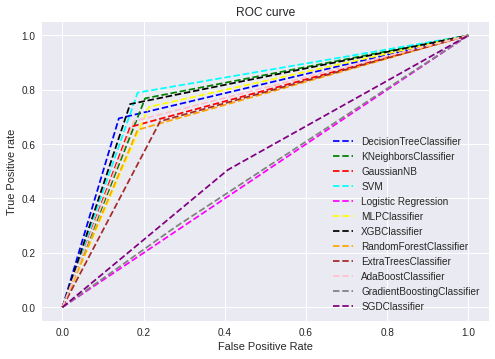

In [ ]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpositive_rate_curve[0], tpositive_rate_curve[0], linestyle='--',color='blue', label='DecisionTreeClassifier')
plt.plot(fpositive_rate_curve[1], tpositive_rate_curve[1], linestyle='--',color='green', label='KNeighborsClassifier')
plt.plot(fpositive_rate_curve[2], tpositive_rate_curve[2], linestyle='--',color='red', label='GaussianNB')
plt.plot(fpositive_rate_curve[3], tpositive_rate_curve[3], linestyle='--',color='cyan', label='SVM')
plt.plot(fpositive_rate_curve[4], tpositive_rate_curve[4], linestyle='--',color='magenta', label='Logistic Regression')
plt.plot(fpositive_rate_curve[5], tpositive_rate_curve[5], linestyle='--',color='yellow', label='MLPClassifier')
plt.plot(fpositive_rate_curve[6], tpositive_rate_curve[6], linestyle='--',color='black', label='XGBClassifier')
plt.plot(fpositive_rate_curve[7], tpositive_rate_curve[7], linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(fpositive_rate_curve[8], tpositive_rate_curve[8], linestyle='--',color='brown', label='ExtraTreesClassifier')
plt.plot(fpositive_rate_curve[9], tpositive_rate_curve[9], linestyle='--',color='pink', label='AdaBoostClassifier')
plt.plot(fpositive_rate_curve[10], tpositive_rate_curve[10], linestyle='--',color='gray', label='GradientBoostingClassifier')
plt.plot(fpositive_rate_curve[11], tpositive_rate_curve[11], linestyle='--',color='purple', label='SGDClassifier')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();